### Importing necessary libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import metrics
import warnings
warnings.filterwarnings('ignore')

### Loading the data into a dataframe

In [4]:
df = pd.read_csv(r"C:\Users\ayanm\Desktop\Data for ML\Real Estate Data V21.csv")
df.head()

,Name,Property Title,Price,Location,Total_Area,Price_per_SQFT,Description,Baths,Balcony
0,Casagrand ECR 14,"4 BHK Flat for sale in Kanathur Reddikuppam, C...",₹1.99 Cr,"Kanathur Reddikuppam, Chennai",2583,7700.0,Best 4 BHK Apartment for modern-day lifestyle ...,4,Yes
1,"Ramanathan Nagar, Pozhichalur,Chennai",10 BHK Independent House for sale in Pozhichal...,₹2.25 Cr,"Ramanathan Nagar, Pozhichalur,Chennai",7000,3210.0,Looking for a 10 BHK Independent House for sal...,6,Yes
2,DAC Prapthi,"3 BHK Flat for sale in West Tambaram, Chennai",₹1.0 Cr,"Kasthuribai Nagar, West Tambaram,Chennai",1320,7580.0,"Property for sale in Tambaram, Chennai. This 3...",3,No
3,"Naveenilaya,Chepauk, Triplicane,Chennai",7 BHK Independent House for sale in Triplicane...,₹3.33 Cr,"Naveenilaya,Chepauk, Triplicane,Chennai",4250,7840.0,Entire Building for sale with 7 units of singl...,5,Yes
4,VGN Spring Field Phase 1,"2 BHK Flat for sale in Avadi, Chennai",₹48.0 L,"Avadi, Chennai",960,5000.0,"Property for sale in Avadi, Chennai. This 2 BH...",3,Yes


In [5]:
df.shape

(14528, 9)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14528 entries, 0 to 14527
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Name            14528 non-null  object 
 1   Property Title  14528 non-null  object 
 2   Price           14528 non-null  object 
 3   Location        14528 non-null  object 
 4   Total_Area      14528 non-null  int64  
 5   Price_per_SQFT  14528 non-null  float64
 6   Description     14528 non-null  object 
 7   Baths           14528 non-null  int64  
 8   Balcony         14528 non-null  object 
dtypes: float64(1), int64(2), object(6)
memory usage: 1021.6+ KB


### Exploratory Data Analysis (EDA)

In [8]:
df['City'] = df['Location'].str.split(',').str.get(-1)
df['BHK'] = df['Property Title'].str.split(' ').str.get(0)
df

,Name,Property Title,Price,Location,Total_Area,Price_per_SQFT,Description,Baths,Balcony,City,BHK
0,Casagrand ECR 14,"4 BHK Flat for sale in Kanathur Reddikuppam, C...",₹1.99 Cr,"Kanathur Reddikuppam, Chennai",2583,7700.0,Best 4 BHK Apartment for modern-day lifestyle ...,4,Yes,Chennai,4
1,"Ramanathan Nagar, Pozhichalur,Chennai",10 BHK Independent House for sale in Pozhichal...,₹2.25 Cr,"Ramanathan Nagar, Pozhichalur,Chennai",7000,3210.0,Looking for a 10 BHK Independent House for sal...,6,Yes,Chennai,10
2,DAC Prapthi,"3 BHK Flat for sale in West Tambaram, Chennai",₹1.0 Cr,"Kasthuribai Nagar, West Tambaram,Chennai",1320,7580.0,"Property for sale in Tambaram, Chennai. This 3...",3,No,Chennai,3
3,"Naveenilaya,Chepauk, Triplicane,Chennai",7 BHK Independent House for sale in Triplicane...,₹3.33 Cr,"Naveenilaya,Chepauk, Triplicane,Chennai",4250,7840.0,Entire Building for sale with 7 units of singl...,5,Yes,Chennai,7
4,VGN Spring Field Phase 1,"2 BHK Flat for sale in Avadi, Chennai",₹48.0 L,"Avadi, Chennai",960,5000.0,"Property for sale in Avadi, Chennai. This 2 BH...",3,Yes,Chennai,2
...,...,...,...,...,...,...,...,...,...,...,...
14523,"Krishna Park Extension, Tilak Nagar,New Delhi","2 BHK Flat for sale in Tilak Nagar, New Delhi",₹40.0 L,"Krishna Park Extension, Tilak Nagar,New Delhi",1053,3800.0,Looking for a good 2 BHK Apartment in Tilak Na...,3,Yes,New Delhi,2
14524,"Rawta, Jaffarpur Kalan,New Delhi",1 BHK Independent House for sale in Jaffarpur ...,₹14.0 L,"Rawta, Jaffarpur Kalan,New Delhi",472,2970.0,1 BHK Independent House for sale in Jaffarpur ...,2,Yes,New Delhi,1
14525,"Rani Garden, Geeta Colony,New Delhi","1 BHK Flat for sale in Geeta Colony, New Delhi",₹30.0 L,"Rani Garden, Geeta Colony,New Delhi",378,7940.0,"Property for sale in Geeta Colony, Delhi. This...",1,Yes,New Delhi,1
14526,"Lig flat rohini,Sector 16E, Sector 16 Rohini,N...","3 BHK Flat for sale in Sector 16 Rohini, New D...",₹60.0 L,"Lig flat rohini,Sector 16E, Sector 16 Rohini,N...",700,8570.0,Check out this 3 BHK Apartment for sale in Roh...,2,Yes,New Delhi,3


In [9]:
df.BHK.unique()

array(['4', '10', '3', '7', '2', '1', '6', '5', '8', '1.5', '2.5', '9',
       '3.5', '5+', 'Studio', '10.5', 'Shop', '4.5', '9.5', '8.5', '7.5'],
      dtype=object)

<Axes: xlabel='BHK', ylabel='count'>

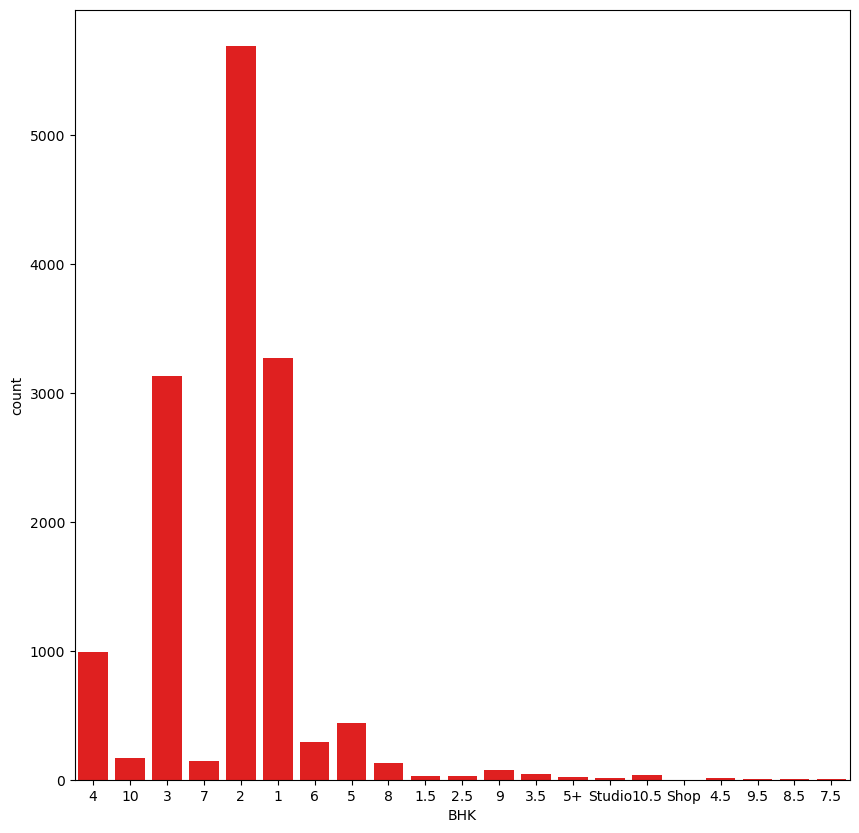

In [10]:
plt.figure(figsize = (10,10))
sns.countplot(x = 'BHK', data = df, color = 'red')

In [11]:
df['BHK'] = df['BHK'].replace('1.5', '1')
df['BHK'] = df['BHK'].replace('2.5', '2')
df['BHK'] = df['BHK'].replace('3.5', '3')
df['BHK'] = df['BHK'].replace('4.5', '4')
df['BHK'] = df['BHK'].replace('7.5', '7')
df['BHK'] = df['BHK'].replace('8.5', '8')
df['BHK'] = df['BHK'].replace('9.5', '9')
df['BHK'] = df['BHK'].replace('10.5', '10')
df['BHK'] = df['BHK'].replace('5+', '5')
df['BHK'] = df['BHK'].replace(['Studio','Shop'], '2')

In [12]:
df.BHK.unique()

array(['4', '10', '3', '7', '2', '1', '6', '5', '8', '9'], dtype=object)

In [13]:
df.BHK = df.BHK.astype(int)

In [14]:
df.BHK.unique()

array([ 4, 10,  3,  7,  2,  1,  6,  5,  8,  9])

In [15]:
df.head()

,Name,Property Title,Price,Location,Total_Area,Price_per_SQFT,Description,Baths,Balcony,City,BHK
0,Casagrand ECR 14,"4 BHK Flat for sale in Kanathur Reddikuppam, C...",₹1.99 Cr,"Kanathur Reddikuppam, Chennai",2583,7700.0,Best 4 BHK Apartment for modern-day lifestyle ...,4,Yes,Chennai,4
1,"Ramanathan Nagar, Pozhichalur,Chennai",10 BHK Independent House for sale in Pozhichal...,₹2.25 Cr,"Ramanathan Nagar, Pozhichalur,Chennai",7000,3210.0,Looking for a 10 BHK Independent House for sal...,6,Yes,Chennai,10
2,DAC Prapthi,"3 BHK Flat for sale in West Tambaram, Chennai",₹1.0 Cr,"Kasthuribai Nagar, West Tambaram,Chennai",1320,7580.0,"Property for sale in Tambaram, Chennai. This 3...",3,No,Chennai,3
3,"Naveenilaya,Chepauk, Triplicane,Chennai",7 BHK Independent House for sale in Triplicane...,₹3.33 Cr,"Naveenilaya,Chepauk, Triplicane,Chennai",4250,7840.0,Entire Building for sale with 7 units of singl...,5,Yes,Chennai,7
4,VGN Spring Field Phase 1,"2 BHK Flat for sale in Avadi, Chennai",₹48.0 L,"Avadi, Chennai",960,5000.0,"Property for sale in Avadi, Chennai. This 2 BH...",3,Yes,Chennai,2


In [16]:
# Function to convert prices to Lakhs
def convert_to_lakhs(Price):
    # Remove currency symbols and commas, and convert to float
    Price = Price.replace('₹', '').strip()
    
    # Convert to float
    try: 
        # Handle cases with and without units
        if 'Cr' in Price:
            return float(Price.replace('Cr', '').strip()) * 100
        elif 'L' in Price:
            return float(Price.replace('L', '').strip())
        else:
            return float(Price)
    except ValueError:
        # Handle unexpected formats
        print(f"ValueError for price: {Price}")
        return None

# Apply the function to the 'price' column
df['price_in_lakhs'] = df['Price'].apply(convert_to_lakhs)


df

ValueError for price: 95.45 Lacs
ValueError for price: 55.0k


,Name,Property Title,Price,Location,Total_Area,Price_per_SQFT,Description,Baths,Balcony,City,BHK,price_in_lakhs
0,Casagrand ECR 14,"4 BHK Flat for sale in Kanathur Reddikuppam, C...",₹1.99 Cr,"Kanathur Reddikuppam, Chennai",2583,7700.0,Best 4 BHK Apartment for modern-day lifestyle ...,4,Yes,Chennai,4,199.0
1,"Ramanathan Nagar, Pozhichalur,Chennai",10 BHK Independent House for sale in Pozhichal...,₹2.25 Cr,"Ramanathan Nagar, Pozhichalur,Chennai",7000,3210.0,Looking for a 10 BHK Independent House for sal...,6,Yes,Chennai,10,225.0
2,DAC Prapthi,"3 BHK Flat for sale in West Tambaram, Chennai",₹1.0 Cr,"Kasthuribai Nagar, West Tambaram,Chennai",1320,7580.0,"Property for sale in Tambaram, Chennai. This 3...",3,No,Chennai,3,100.0
3,"Naveenilaya,Chepauk, Triplicane,Chennai",7 BHK Independent House for sale in Triplicane...,₹3.33 Cr,"Naveenilaya,Chepauk, Triplicane,Chennai",4250,7840.0,Entire Building for sale with 7 units of singl...,5,Yes,Chennai,7,333.0
4,VGN Spring Field Phase 1,"2 BHK Flat for sale in Avadi, Chennai",₹48.0 L,"Avadi, Chennai",960,5000.0,"Property for sale in Avadi, Chennai. This 2 BH...",3,Yes,Chennai,2,48.0
...,...,...,...,...,...,...,...,...,...,...,...,...
14523,"Krishna Park Extension, Tilak Nagar,New Delhi","2 BHK Flat for sale in Tilak Nagar, New Delhi",₹40.0 L,"Krishna Park Extension, Tilak Nagar,New Delhi",1053,3800.0,Looking for a good 2 BHK Apartment in Tilak Na...,3,Yes,New Delhi,2,40.0
14524,"Rawta, Jaffarpur Kalan,New Delhi",1 BHK Independent House for sale in Jaffarpur ...,₹14.0 L,"Rawta, Jaffarpur Kalan,New Delhi",472,2970.0,1 BHK Independent House for sale in Jaffarpur ...,2,Yes,New Delhi,1,14.0
14525,"Rani Garden, Geeta Colony,New Delhi","1 BHK Flat for sale in Geeta Colony, New Delhi",₹30.0 L,"Rani Garden, Geeta Colony,New Delhi",378,7940.0,"Property for sale in Geeta Colony, Delhi. This...",1,Yes,New Delhi,1,30.0
14526,"Lig flat rohini,Sector 16E, Sector 16 Rohini,N...","3 BHK Flat for sale in Sector 16 Rohini, New D...",₹60.0 L,"Lig flat rohini,Sector 16E, Sector 16 Rohini,N...",700,8570.0,Check out this 3 BHK Apartment for sale in Roh...,2,Yes,New Delhi,3,60.0


In [17]:
df.drop(['Name','Property Title','Price','Location','Description'], axis = 1, inplace = True)
df.head()

,Total_Area,Price_per_SQFT,Baths,Balcony,City,BHK,price_in_lakhs
0,2583,7700.0,4,Yes,Chennai,4,199.0
1,7000,3210.0,6,Yes,Chennai,10,225.0
2,1320,7580.0,3,No,Chennai,3,100.0
3,4250,7840.0,5,Yes,Chennai,7,333.0
4,960,5000.0,3,Yes,Chennai,2,48.0


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14528 entries, 0 to 14527
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Total_Area      14528 non-null  int64  
 1   Price_per_SQFT  14528 non-null  float64
 2   Baths           14528 non-null  int64  
 3   Balcony         14528 non-null  object 
 4   City            14528 non-null  object 
 5   BHK             14528 non-null  int32  
 6   price_in_lakhs  14526 non-null  float64
dtypes: float64(2), int32(1), int64(2), object(2)
memory usage: 737.9+ KB


In [19]:
df.isnull().sum()

Total_Area        0
Price_per_SQFT    0
Baths             0
Balcony           0
City              0
BHK               0
price_in_lakhs    2
dtype: int64

In [20]:
df = df.dropna()

In [21]:
df.describe()

,Total_Area,Price_per_SQFT,Baths,BHK,price_in_lakhs
count,14526.000000,14526.000000,14526.000000,14526.000000,14526.000000
mean,1297.948437,11705.576897,2.751342,2.560719,106.732880
std,1245.740065,49008.950532,0.898185,1.660723,186.743861
min,70.000000,0.000000,1.000000,1.000000,1.000000
25%,650.000000,4480.000000,2.000000,2.000000,37.000000
50%,1000.000000,6050.000000,3.000000,2.000000,65.000000
75%,1439.000000,9310.000000,3.000000,3.000000,114.000000
max,35000.000000,999000.000000,6.000000,10.000000,8400.000000


### Outlier Detection and removal

In [23]:
df[df.Price_per_SQFT == 0]

,Total_Area,Price_per_SQFT,Baths,Balcony,City,BHK,price_in_lakhs
4277,3000,0.0,5,Yes,Bangalore,4,2.0
5856,2800,0.0,4,Yes,Bangalore,3,3.0
7948,1800,0.0,3,Yes,Mumbai,2,1.0


In [24]:
df_new = df[df['Price_per_SQFT'] != 0]
df_new.shape

(14523, 7)

In [25]:
df1 = df_new[df_new['Price_per_SQFT'] <= 100000]
df1.shape

(14433, 7)

In [26]:
df1.describe()

,Total_Area,Price_per_SQFT,Baths,BHK,price_in_lakhs
count,14433.000000,14433.000000,14433.000000,14433.000000,14433.000000
mean,1279.720987,8279.512922,2.749948,2.560313,107.277975
std,1141.594660,7183.853432,0.894155,1.657931,187.199695
min,70.000000,1000.000000,1.000000,1.000000,1.000000
25%,650.000000,4470.000000,2.000000,2.000000,38.000000
50%,1000.000000,6020.000000,3.000000,2.000000,65.000000
75%,1425.000000,9200.000000,3.000000,3.000000,115.000000
max,15000.000000,92590.000000,6.000000,10.000000,8400.000000


In [27]:
df1.head()

,Total_Area,Price_per_SQFT,Baths,Balcony,City,BHK,price_in_lakhs
0,2583,7700.0,4,Yes,Chennai,4,199.0
1,7000,3210.0,6,Yes,Chennai,10,225.0
2,1320,7580.0,3,No,Chennai,3,100.0
3,4250,7840.0,5,Yes,Chennai,7,333.0
4,960,5000.0,3,Yes,Chennai,2,48.0


In [28]:
df1.City.unique()

array([' Chennai', 'Chennai', 'Bangalore', ' Bangalore', 'Hyderabad',
       ' Hyderabad', 'Mumbai', ' Mumbai', 'Thane', 'Kolkata', ' Kolkata',
       'Pune', ' Pune', ' New Delhi', 'New Delhi'], dtype=object)

In [29]:
df1['City'] = df1['City'].replace(' Chennai', 'Chennai')
df1['City'] = df1['City'].replace(' Bangalore', 'Bangalore')
df1['City'] = df1['City'].replace(' Hyderabad', 'Hyderabad')
df1['City'] = df1['City'].replace(' Mumbai', 'Mumbai')
df1['City'] = df1['City'].replace(' Kolkata', 'Kolkata')
df1['City'] = df1['City'].replace(' Pune', 'Pune')
df1['City'] = df1['City'].replace(' New Delhi', 'New Delhi')

In [30]:
df1.City.unique()

array(['Chennai', 'Bangalore', 'Hyderabad', 'Mumbai', 'Thane', 'Kolkata',
       'Pune', 'New Delhi'], dtype=object)

### One Hot Encoding

In [32]:
df2 = pd.get_dummies(df1, columns=['City'])
df2.head()

,Total_Area,Price_per_SQFT,Baths,Balcony,BHK,price_in_lakhs,City_Bangalore,City_Chennai,City_Hyderabad,City_Kolkata,City_Mumbai,City_New Delhi,City_Pune,City_Thane
0,2583,7700.0,4,Yes,4,199.0,False,True,False,False,False,False,False,False
1,7000,3210.0,6,Yes,10,225.0,False,True,False,False,False,False,False,False
2,1320,7580.0,3,No,3,100.0,False,True,False,False,False,False,False,False
3,4250,7840.0,5,Yes,7,333.0,False,True,False,False,False,False,False,False
4,960,5000.0,3,Yes,2,48.0,False,True,False,False,False,False,False,False


In [33]:
df2['Balcony'] = df2['Balcony'].map({'Yes': True, 'No': False})
df2.head()

,Total_Area,Price_per_SQFT,Baths,Balcony,BHK,price_in_lakhs,City_Bangalore,City_Chennai,City_Hyderabad,City_Kolkata,City_Mumbai,City_New Delhi,City_Pune,City_Thane
0,2583,7700.0,4,True,4,199.0,False,True,False,False,False,False,False,False
1,7000,3210.0,6,True,10,225.0,False,True,False,False,False,False,False,False
2,1320,7580.0,3,False,3,100.0,False,True,False,False,False,False,False,False
3,4250,7840.0,5,True,7,333.0,False,True,False,False,False,False,False,False
4,960,5000.0,3,True,2,48.0,False,True,False,False,False,False,False,False


In [34]:
df2.shape

(14433, 14)

### Defining Feature and Target Variable

In [36]:
X = df2.drop(['price_in_lakhs'], axis = 1)
y = df2['price_in_lakhs']

### Train test split

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 20)

In [39]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR

### Linear Regression 


In [41]:
lr = LinearRegression()

In [42]:
lr.fit(X_train, y_train)

LinearRegression()

In [43]:
lr.score(X_test, y_test)

0.4819911799252927

### RandomForestRegressor

In [45]:
from sklearn.ensemble import RandomForestRegressor

In [46]:
rf = RandomForestRegressor()
rf.fit(X_train, y_train)

RandomForestRegressor()

In [47]:
y_pred = rf.predict(X_test)

In [48]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)
r2

0.600856134688905

### DecisionTreeRegressor 

In [50]:
from sklearn.tree import DecisionTreeRegressor 

In [51]:
dt = DecisionTreeRegressor()

In [52]:
dt.fit(X_train, y_train)

DecisionTreeRegressor()

In [53]:
dt.score(X_test, y_test)

-0.03655066968516918

### GradientBoostingRegressor and SVR 

In [55]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR

In [56]:
svr = SVR()
gbr = GradientBoostingRegressor()

In [57]:
svr.fit(X_train, y_train)

SVR()

In [58]:
svr.score(X_test, y_test)

0.27188177482716835

In [59]:
gbr.fit(X_train, y_train)

GradientBoostingRegressor()

In [60]:
gbr.score(X_test, y_test)

0.6980701087767625

### Hyperparameter Tuning to get best results

In [62]:
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import HalvingGridSearchCV

from sklearn.model_selection import ShuffleSplit
def find_best_model(X,y):
    algos = {
        'random_forest': {
            'model': RandomForestRegressor(),
            'params' : {
                'n_estimators': [200, 300],
                'min_samples_split': [5, 10, 15]
            }
        },
        'linear_regression': {
            'model': LinearRegression(),
            'params': {
                'n_jobs': [-1, None]
            }
        },
        'SVR' :{
            'model': SVR(),
            'params': {
                'C': [100, 200],
                'kernel':['poly','rbf'],
            }
        },
        'decision_tree' :{
            'model': DecisionTreeRegressor(),
            'params': {
                'criterion': ['mse','friedman_mse'],
                'splitter': ['best','random']
            }
        },
        'gradient_boosting': {
            'model': GradientBoostingRegressor(),
            'params':{
                'n_estimators': [200, 300],
                'learning_rate': [0.05, 0.08, 0.09],
                'min_samples_split': [5, 10, 15]
            }
        }
    }
    scores = []
    cv = ShuffleSplit(n_splits= 5, test_size = 0.2, random_state = 20)
    for algo_name, config in algos.items():
        gs = HalvingGridSearchCV(config['model'], config['params'], cv = cv, return_train_score = False)
        gs.fit(X, y)
        scores.append ({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })
    return pd.DataFrame (scores, columns = ['model','best_score','best_params'])
find_best_model(X,y)

,model,best_score,best_params
0,random_forest,0.787030,"{'min_samples_split': 15, 'n_estimators': 200}"
1,linear_regression,0.596017,{'n_jobs': -1}
2,SVR,0.739009,"{'C': 200, 'kernel': 'rbf'}"
3,decision_tree,-0.270334,"{'criterion': 'friedman_mse', 'splitter': 'best'}"
4,gradient_boosting,0.787795,"{'learning_rate': 0.05, 'min_samples_split': 1..."


### Here we can see Gradient Boosting Regressor is giving us the best result for the prediction of price